# Python/Jupyter Demonstration

In this Python/Jupyter demonstration, I'm going to demonstrate some simple Python things and do a bit of image analysis.

You can use Python a bit like a calculator. You use all the normal symbols as you might expect.
* +, -, *, / for add subtract multiply divide
* ** for to the power of
* % for remainder when divided

In [1]:
# Add number x and number y together:
x = 4
y = 100
print(x + y)
print(x - y)
print(x * y)
print(x / y)
print(y ** x) # y to the power of x

104
-96
400
0.04
100000000


You can import external libraries using the import command. It's quite common to use shortened names for numpy, matplotlib etc. to keep things a bit shorter, but it is optional.
* NumPy = Numerical python e.g. Matrices, fourier transforms, linear regression etc.
* MatplotLib = Plotting library - similar interface to Matlab
* Pandas = library for handling tables, kind of similar to some features of R

In [2]:
import numpy as np # could also write just import numpy. Then replace np with numpy below.
from scipy.ndimage import median_filter

import matplotlib
import matplotlib.pyplot as plt
import pandas as pd

# Import some code I wrote to make this more interesting and make nice plots
from utils import *


rng_seed = 1
rng = np.random.default_rng(rng_seed)

In [3]:
! ls -l data

total 88
-rw-r--r--  1 else01  3000019  17002 Oct 17 15:45 image_0.npz
-rw-r--r--  1 else01  3000019  20802 Oct 17 15:45 image_2.npz
drwxr-xr-x  9 else01  3000019    288 Oct 17 18:12 images
drwxr-xr-x  5 else01  3000019    160 Oct 17 18:17 tables


In [4]:
def load_image(filename, rng=rng):
    # A function to load RSOM images.
    # 1. Load the image data from the file
    raw_image = np.load(filename)["image"].astype(np.double)
    # 2. Include a weighting for exponential decay with depth
    weight = np.exp(-2*np.arange(raw_image.shape[2])/raw_image.shape[2])
    raw_image = raw_image * weight[None, None]
    # 3. Add some noise (normal distribution, sigma=0.1)
    image = raw_image + rng.normal(loc=0., scale=0.1, size=raw_image.shape)
    return image, raw_image

In [5]:
image_name = "image_0"
image, raw_image = load_image(f"data/{image_name}.npz")

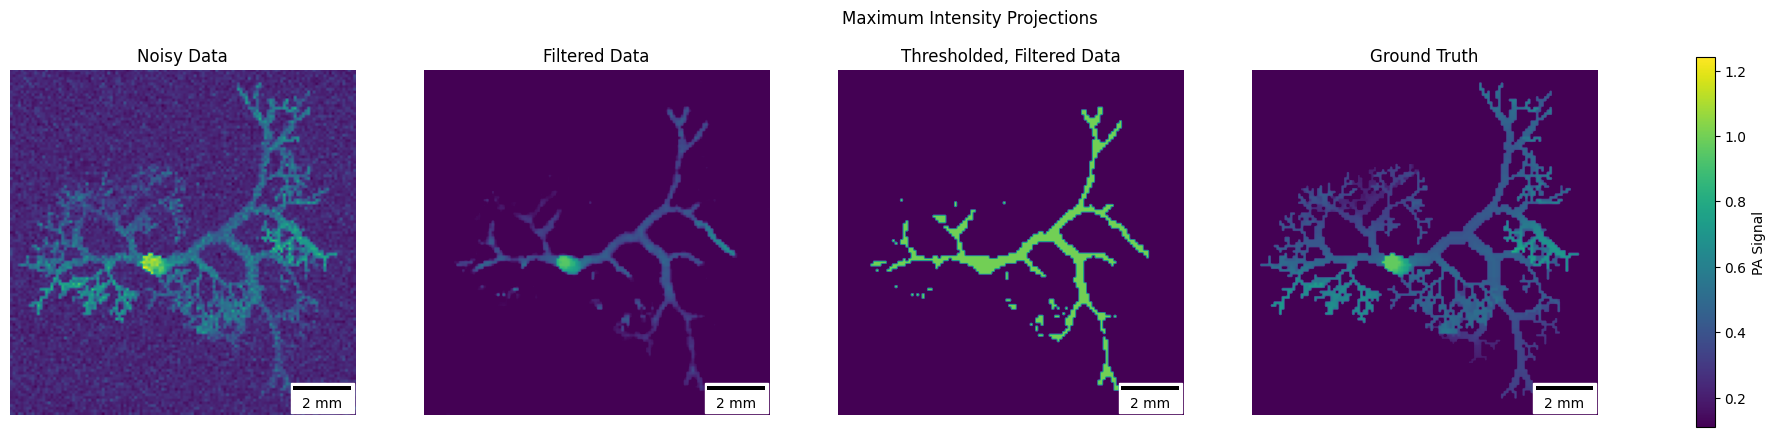

In [6]:
# Apply a median filter. 
filtered = median_filter(image, (3, 3, 3))
plot_mip([image, filtered, filtered>0.2, raw_image], labels=["Noisy Data", "Filtered Data", "Thresholded, Filtered Data", "Ground Truth"])

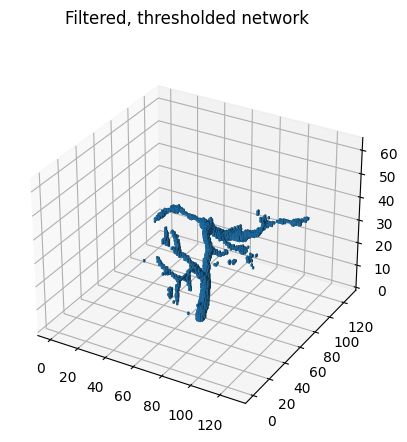

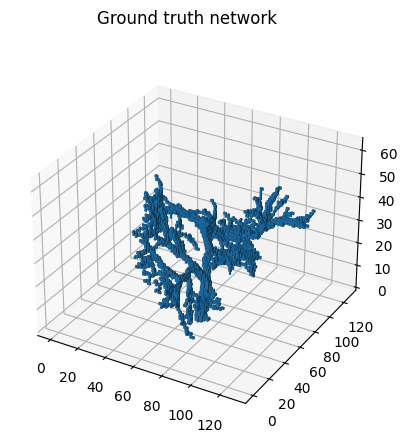

In [7]:
# You can also make a 3D plot:

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.voxels(filtered>0.2)
fig.suptitle("Filtered, thresholded network")
plt.show()
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.voxels(raw_image > 0.)
fig.suptitle("Ground truth network")
plt.show()

In [8]:
# Let's say you want to compare different measurements for the different filters:

results = []
results.append({"Image Type": "Ground Truth", "Mean Intensity": np.mean(raw_image),
                "Standard Deviation Intensity": np.std(raw_image), 
                "Median Intensity": np.median(raw_image), "Image Name": image_name})

results.append({"Image Type": "Noisy Image", "Mean Intensity": np.mean(image),
                "Standard Deviation Intensity": np.std(image), 
                "Median Intensity": np.median(image), "Image Name": image_name})

results.append({"Image Type": "Filtered Image", "Mean Intensity": np.mean(filtered),
                "Standard Deviation Intensity": np.std(filtered), 
                "Median Intensity": np.median(filtered), "Image Name": image_name})

image_metrics = pd.DataFrame(results)

display(image_metrics)

,Image Type,Mean Intensity,Standard Deviation Intensity,Median Intensity,Image Name
0,Ground Truth,0.002861,0.037716,0.000000,image_0
1,Noisy Image,0.002817,0.106749,0.000830,image_0
2,Filtered Image,0.001775,0.032973,0.000639,image_0


In [9]:
# This can all be tidied up into a function and run over many datasets:

def process_image(image_name):
    image, raw_image = load_image(f"data/{image_name}.npz")
    # Apply a median filter. 
    filtered = median_filter(image, (3, 3, 3))
    # Plot and save maximum intensity projections
    plot_mip([image, filtered, filtered>0.2, raw_image], 
             output_file=f"data/images/MIP_{image_name}.png",
             labels=["Noisy Data", "Filtered Data", "Thresholded, Filtered Data", "Ground Truth"])
    
    # Make 3D plot and save - commented out because this is slow
    
    # fig = plt.figure()
    # ax = fig.add_subplot(projection='3d')
    # ax.voxels(filtered>0.2)
    # fig.suptitle("Filtered, thresholded network")
    # plt.savefig(f"data/images/3D_filtered_{image_name}.png")
    # plt.close()
    # fig = plt.figure()
    # ax = fig.add_subplot(projection='3d')
    # ax.voxels(raw_image > 0.)
    # fig.suptitle("Ground truth network")
    # plt.savefig(f"data/images/3D_groundtruth_{image_name}.png")
    # plt.close()
    
    # Make a table of measurements
    
    results = []
    results.append({"Image Type": "Ground Truth", "Mean Intensity": np.mean(raw_image),
                    "Standard Deviation Intensity": np.std(raw_image), 
                    "Median Intensity": np.median(raw_image), "Image Name": image_name})

    results.append({"Image Type": "Noisy Image", "Mean Intensity": np.mean(image),
                    "Standard Deviation Intensity": np.std(image), 
                    "Median Intensity": np.median(image), "Image Name": image_name})

    results.append({"Image Type": "Filtered Image", "Mean Intensity": np.mean(filtered),
                    "Standard Deviation Intensity": np.std(filtered), 
                    "Median Intensity": np.median(filtered), "Image Name": image_name})

    image_metrics = pd.DataFrame(results)
    return image_metrics

In [10]:
image_0_table = process_image("image_0")

In [11]:
image_2_table = process_image("image_2")

In [12]:
image_0_table.to_csv("data/tables/image_0.csv")
image_2_table.to_csv("data/tables/image_2.csv")